In [734]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup 
from urllib.request import urlopen, Request



In [735]:
#importing the driver names and the gap between them and their team mates flat file
quali = pd.read_csv('quali.csv')
print(quali.head(4))
quali.columns

   Pos           Driver  Average                 Car
0   15   George Russell   -0.371     Williams       
1   19  Mick Schumacher   -0.908               Haas 
2    9     Pierre Gasly   -0.603  AlphaTauri        
3    1   Max Verstappen   -0.528           Red Bull 


Index(['Pos', 'Driver', 'Average', 'Car'], dtype='object')

In [736]:
# Web Scraping table of data on Formula 1 2021 season
url = 'https://www.skysports.com/f1/stats/2021/drivers'
# Create object page
page = requests.get(url)

# parser-lxml = Change html to Python friendly format

soup = BeautifulSoup(page.text, 'lxml')
soup

# Obtain information from tag <table>
table = soup.find('table', {'class':'table -small -nobordertop'})

headers = []
for i in table.find_all('th'):  
    title = i.text
    headers.append(title)
   

In [737]:
# Creating a datafram from the website data
df = pd.DataFrame(columns = headers)

for row in table.find_all('tr')[1:]:
    data = row.find_all('td')
    row_data = [td.text.strip() for td in data]
    length = len(df)
    df.loc[length] = row_data

  
df

,Pos,Driver,Team,Pts,Deficit
0,1,M Verstappen,Red Bull,395.5,
1,2,L Hamilton,Mercedes,387.5,-8
2,3,V Bottas,Mercedes,226,-169.5
3,4,S Perez,Red Bull,190,-205.5
4,5,C Sainz,Ferrari,164.5,-231
5,6,L Norris,McLaren,160,-235.5
6,7,C Leclerc,Ferrari,159,-236.5
7,8,D Ricciardo,McLaren,115,-280.5
8,9,P Gasly,Alpha Tauri,110,-285.5
9,10,F Alonso,Alpine,81,-314.5


In [738]:
# Dropping columns 
df21=df.drop(['Pos','Deficit'], axis=1)
df21

,Driver,Team,Pts
0,M Verstappen,Red Bull,395.5
1,L Hamilton,Mercedes,387.5
2,V Bottas,Mercedes,226
3,S Perez,Red Bull,190
4,C Sainz,Ferrari,164.5
5,L Norris,McLaren,160
6,C Leclerc,Ferrari,159
7,D Ricciardo,McLaren,115
8,P Gasly,Alpha Tauri,110
9,F Alonso,Alpine,81


In [739]:
#importing 2020 data
df2 = pd.read_csv('2020.csv')
print(df2.head(4))
df2.columns

   Unnamed: 0  Pos        Driver          Team  Pts  Deficit
0           0    1    L Hamilton      Mercedes  347      NaN
1           1    2      V Bottas      Mercedes  223   -124.0
2           2    3  M Verstappen      Red Bull  214   -133.0
3           3    4       S Perez  Racing Point  125   -222.0


Index(['Unnamed: 0', 'Pos', 'Driver', 'Team', 'Pts', 'Deficit'], dtype='object')

In [740]:
df20= df2.drop(['Pos','Deficit','Unnamed: 0'], axis=1)
df20

,Driver,Team,Pts
0,L Hamilton,Mercedes,347
1,V Bottas,Mercedes,223
2,M Verstappen,Red Bull,214
3,S Perez,Racing Point,125
4,D Ricciardo,Alpine,119
5,C Sainz,McLaren,105
6,A Albon,Red Bull,105
7,C Leclerc,Ferrari,98
8,L Norris,McLaren,97
9,P Gasly,Alpha Tauri,75


In [741]:
# indexing points column for 2020 F1 season
print(df2[['Pts']].to_string(index=False)) 

 Pts
 347
 223
 214
 125
 119
 105
 105
  98
  97
  75
  75
  62
  33
  32
  10
   4
   4
   3
   2
   1
   0


In [742]:
# Checking the average points scored in 2020 F1 Season
df2['Pts'].mean()

82.57142857142857

In [743]:
# Creating dataframes 
Standings_2021 = pd.DataFrame({
    "Position":["1st","2nd","3rd","4th","5th","6th","7th","8th","9th","10th",],
    "Team":["Mercedes","RedBull","Ferrari","McLaren","Alpine","Alpha Tauri","Aston Martin","Williams","Alpha Romeo","Haas",]})
Standings_2021

,Position,Team
0,1st,Mercedes
1,2nd,RedBull
2,3rd,Ferrari
3,4th,McLaren
4,5th,Alpine
5,6th,Alpha Tauri
6,7th,Aston Martin
7,8th,Williams
8,9th,Alpha Romeo
9,10th,Haas


In [744]:
Points_2021 =  pd.DataFrame({
    "Position":["1st","2nd","3rd","4th","5th","6th","7th","8th","9th","10th",],
    "Points":["613","585","323","275","155","142","77","23","13","0",]
})
Points_2021

,Position,Points
0,1st,613
1,2nd,585
2,3rd,323
3,4th,275
4,5th,155
5,6th,142
6,7th,77
7,8th,23
8,9th,13
9,10th,0


In [745]:
# merging of a dataframe using an inner join
inner = pd.merge(Standings_2021, Points_2021, on='Position', how='inner')
inner

,Position,Team,Points
0,1st,Mercedes,613
1,2nd,RedBull,585
2,3rd,Ferrari,323
3,4th,McLaren,275
4,5th,Alpine,155
5,6th,Alpha Tauri,142
6,7th,Aston Martin,77
7,8th,Williams,23
8,9th,Alpha Romeo,13
9,10th,Haas,0


In [746]:
#read in csv file of teams, points plus the A and B drivers for each team 
TeamPoints = pd.read_csv('TeamPoints.csv')
TeamPoints

,Team,Points,Driver
0,Mercedes,387,A
1,RedBull,395,A
2,Ferrari,164,A
3,McLaren,160,A
4,Alpine,81,A
5,Alpha Tauri,110,A
6,Aston Martin,43,A
7,Williams,16,A
8,Alpha Romeo,10,A
9,Haas,0,A


In [747]:
#Groupby teams and calculating mean points earning
TeamPoints.groupby('Team').mean()

,Points
Team,
Alpha Romeo,6.5
Alpha Tauri,71.0
Alpine,77.5
Aston Martin,38.5
Ferrari,161.5
Haas,0.0
McLaren,137.5
Mercedes,306.5
RedBull,292.5


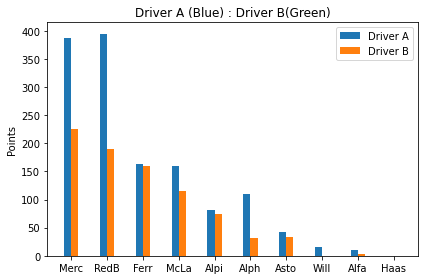

In [748]:

driverA = [387,395,164,160,81,110,43,16,10,0]
driverB = [226,190,159,115,74,32,34,0,3,0]


width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(X - width/2, driverA, width, label='Driver A')
rects2 = ax.bar(X + width/2, driverB, width, label='Driver B')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Points')
ax.set_title('Driver A (Blue) : Driver B(Green)')
ax.legend()
plt.xticks(x, ['Merc', 'RedB','Ferr', 'McLa','Alpi', 'Alph','Asto', 'Will','Alfa', 'Haas',])


fig.tight_layout()

plt.show()

([<matplotlib.axis.XTick at 0x24fefeb7610>,
 [Text(0, 0, 'Will'),
  Text(1, 0, 'Haas'),
  Text(2, 0, 'Alph'),
  Text(3, 0, 'RedB'),
  Text(4, 0, 'Merc'),
  Text(5, 0, 'Alfa'),
  Text(6, 0, 'McLa'),
  Text(7, 0, 'Asto'),
  Text(8, 0, 'Ferr'),
  Text(9, 0, 'Alpi')])

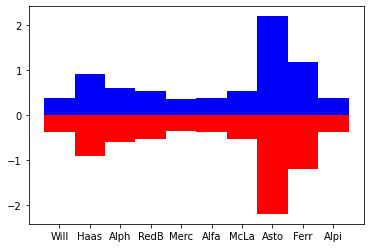

In [749]:
# Graphing the gaps between team mates in qaulification runs on average
x = range(10)
# The negative values represent the amount of time less than their team mate it took to complete a lap on avg
Fastest = [-0.371,-0.908,-0.603,-0.528,-0.347,-0.37,-0.536,-2.188,-1.185,-0.369]
Slowest= [0.371,0.908,0.603,0.528,0.347,0.37,0.536,2.188,1.185,0.369]
fig = plt.figure()
ax = plt.subplot(111)
ax.bar(x, Fastest, width=1, color='r')
ax.bar(x, Slowest, width=1, color='b')
plt.xticks(x, ['Will','Haas','Alph','RedB','Merc','Alfa','McLa','Asto','Ferr','Alpi'])

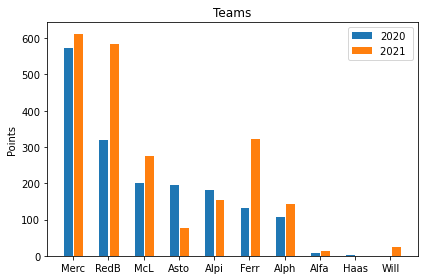

In [750]:
season20 = [573,319,202,195,181,131,107,8,3,0]
season21 = [613,585,275,77,155,323,142,13,0,23]
width = 0.25 

fig, ax = plt.subplots()
rect1 = ax.bar(X - width/2, season20, width, label='2020')
rect2 = ax.bar(X + width/1.5, season21, width, label='2021 ')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Points')
ax.set_title('Teams')
ax.legend()
plt.xticks(x, ['Merc', 'RedB','McL', 'Asto','Alpi', 'Ferr','Alph', 'Alfa','Haas', 'Will',])


fig.tight_layout()

plt.show()